<h1> 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 컨볼루션 신경망(CNN) </h1>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

(X_train,Y_train) , (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28 , 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


C:\Users\Dong Hwa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


데이터셋 구조 준비

In [2]:
model = Sequential()
# 첫번째 인자(마스크를 몇 개 적용할지 정함), kernel_size(마스크의 크기(행,열))
# input_shape(Dense층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려줘야함 (행, 열 ,색상(3) 또는 흑백(1)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

<strong>컨볼루션 신경망</strong>은 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터,커널)를 도입하는 기법!<br>
마스크에는 가중치가 들어가 있는데 마스크의 가중치로 원래 있던 값을 곱해주면서 나온 값을 정리하면 새롭게 만들어지는 층이 생긴다.<br>
이 층을 <strong>컨볼루션</strong>(합성곱)이라고 부른다. 컨볼루션을 만들면 입력 데이터로부터 더욱 정교한 특징을 추출할 수 있음.<br>이러한 마스크를 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐. 케라스에서 컨볼루션 층을 추가하는 함수는 <strong>Conv2D()</strong>

In [3]:
# pool_size가 2이므로 전체 크기가 반으로 줄어듬
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<strong>맥스 풀링</strong>기법은 이미지 결과가 아직 크고 복잡해 축소시키기 위해 사용하는 기법! <br>
맥스 풀링은 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 사용 X <br>
<strong>드롭 아웃(drop out)</strong>은 은닉층에 배치된 노드 중 일부를 임의로 꺼버려 과적합 현상을 방지하는 기법!<br>
<strong>플래튼(flatten)</strong>은 Dense() 함수를 이용해 만들었던 기본 층에 컨볼루션 층, 맥스 풀링(2차원 배열)을 1차원으로 바꿔주는 함수


Epoch 00001: val_loss improved from inf to 0.05891, saving model to ./model/01-0.0589.hdf5

Epoch 00002: val_loss improved from 0.05891 to 0.04258, saving model to ./model/02-0.0426.hdf5

Epoch 00003: val_loss improved from 0.04258 to 0.03842, saving model to ./model/03-0.0384.hdf5

Epoch 00004: val_loss improved from 0.03842 to 0.03214, saving model to ./model/04-0.0321.hdf5

Epoch 00005: val_loss improved from 0.03214 to 0.03127, saving model to ./model/05-0.0313.hdf5

Epoch 00006: val_loss did not improve from 0.03127

Epoch 00007: val_loss improved from 0.03127 to 0.03085, saving model to ./model/07-0.0309.hdf5

Epoch 00008: val_loss improved from 0.03085 to 0.02999, saving model to ./model/08-0.0300.hdf5

Epoch 00009: val_loss improved from 0.02999 to 0.02888, saving model to ./model/09-0.0289.hdf5

Epoch 00010: val_loss did not improve from 0.02888

Epoch 00011: val_loss did not improve from 0.02888

Epoch 00012: val_loss did not improve from 0.02888

Epoch 00013: val_loss did n

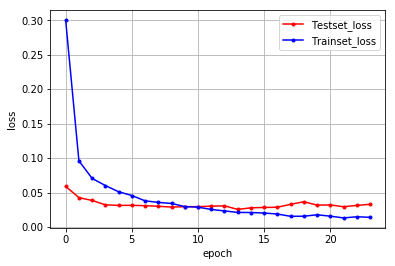

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only= True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test,Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()